## Basic SVR Model Dataset Practice

In [94]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DS1

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#loading dataset

df = pd.read_csv(DS1)
X = df[['Level']].values
y = df['Salary'].values

In [97]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()


X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y.reshape(-1,1))


In [98]:
from sklearn.svm import SVR
svr = SVR(kernel='linear',C=10,epsilon=0.2)

svr.fit(X_scaled,y_scaled)

X_line = np.linspace(X.min(),X.max(),100).reshape(-1,1)
X_line_scaled = sc_X.transform(X_line)

y_pred_scaled = svr.predict(X_line_scaled)
y_pred = sc_y.inverse_transform((y_pred_scaled).reshape(-1,1)).flatten()

c:\Users\parde\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


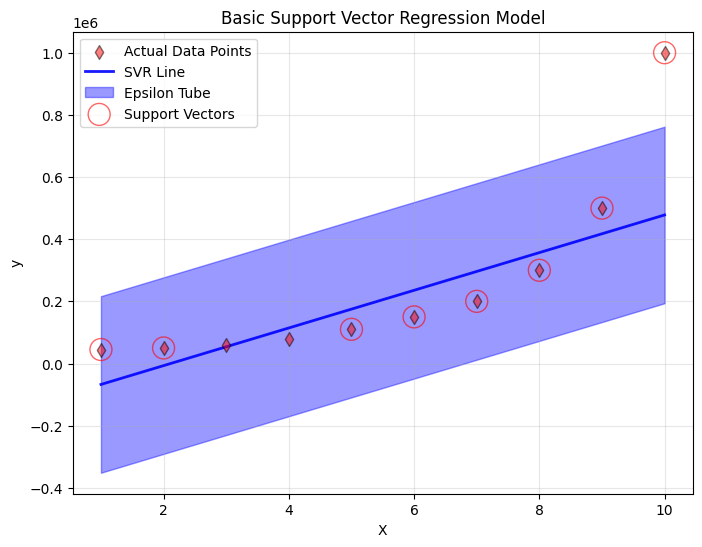

In [106]:
#visualization
plt.figure(figsize=(8,6))

epsilon_original = sc_y.scale_[0]
y_upper = y_pred + epsilon_original
y_lower = y_pred - epsilon_original

plt.scatter(X,y,label='Actual Data Points',color='r',alpha=0.5,marker='d',s=50,zorder=5,edgecolors='black')
plt.plot(X_line,y_pred,label='SVR Line',color='blue',alpha=0.9,linewidth=2)
plt.fill_between(X_line.flatten(),y_lower, y_upper, label='Epsilon Tube',color='blue',alpha=0.4)

#highlighting support vectors
sv = svr.support_
sv_X = X[sv]
sv_y = y[sv]

plt.scatter(sv_X,sv_y,label='Support Vectors',facecolor='none',alpha=0.6,s=250,zorder=6,edgecolors='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Basic Support Vector Regression Model')
plt.legend()
plt.grid(True,alpha=0.3)
plt.show()